# <center> Практика. Статистические тесты в контексте EDA

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе своего анализа вы должны:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. А также ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

1. тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;
2. тест для категориальных признаков.

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Ответить на эти вопросы нам помогут данные о зарплатах в сфере Data Science за 2020–2022 годы.

Данные содержат следующие столбцы:
*   *work_year* — Год, в котором была выплачена зарплата.
*   *work_year* — Опыт работы на этой должности в течение года.
*   *employment_type* — Тип трудоустройства для этой роли.
*   *job_title* — Роль, в которой соискатель работал в течение года.
*   *salary* — Общая выплаченная валовая сумма заработной платы.
*   *salary_currency* — Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
*   *salary_in_usd* — Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
*   *employee_residence* — Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
*   *remote_ratio* — Общий объём работы, выполняемой удалённо
*   *company_location* — Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
*   *company_size* — Среднее количество людей, работавших в компании в течение года.

Источник датасета: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## Загрузка данных

In [2]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

Данные были скопированы в Google Drive, они доступны по [ссылке](https://drive.google.com/file/d/1PFbQOYwc76B1C7kqeHCHhGM1LlsYZYQv/view?usp=sharing).

Для скачивания данных используйте команду `!wget`.

Данные появятся в локальной директории.

In [3]:
# скачиваем датасет 

# в ссылке указан id файла на Google Drive "1b_NEk_nrBLhYxBo-DI-TVLRsTIOYvk-r", id файла взят из ссылки на файл https://drive.google.com/file/d/1b_NEk_nrBLhYxBo-DI-TVLRsTIOYvk-r/view
!wget "https://drive.google.com/file/d/1PFbQOYwc76B1C7kqeHCHhGM1LlsYZYQv/view?usp=sharing" -O ds_salaries.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# загружаем датасет
data = pd.read_csv('data/ds_salaries.csv', index_col=[0])
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


В датасете 607 записей (без пропущенных значений).

In [7]:
# описание числовых признаков
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
# описание категориальных признаков
data.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


Проверим данные на наличие полных дубликатов:

In [39]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 11)


<Axes: >

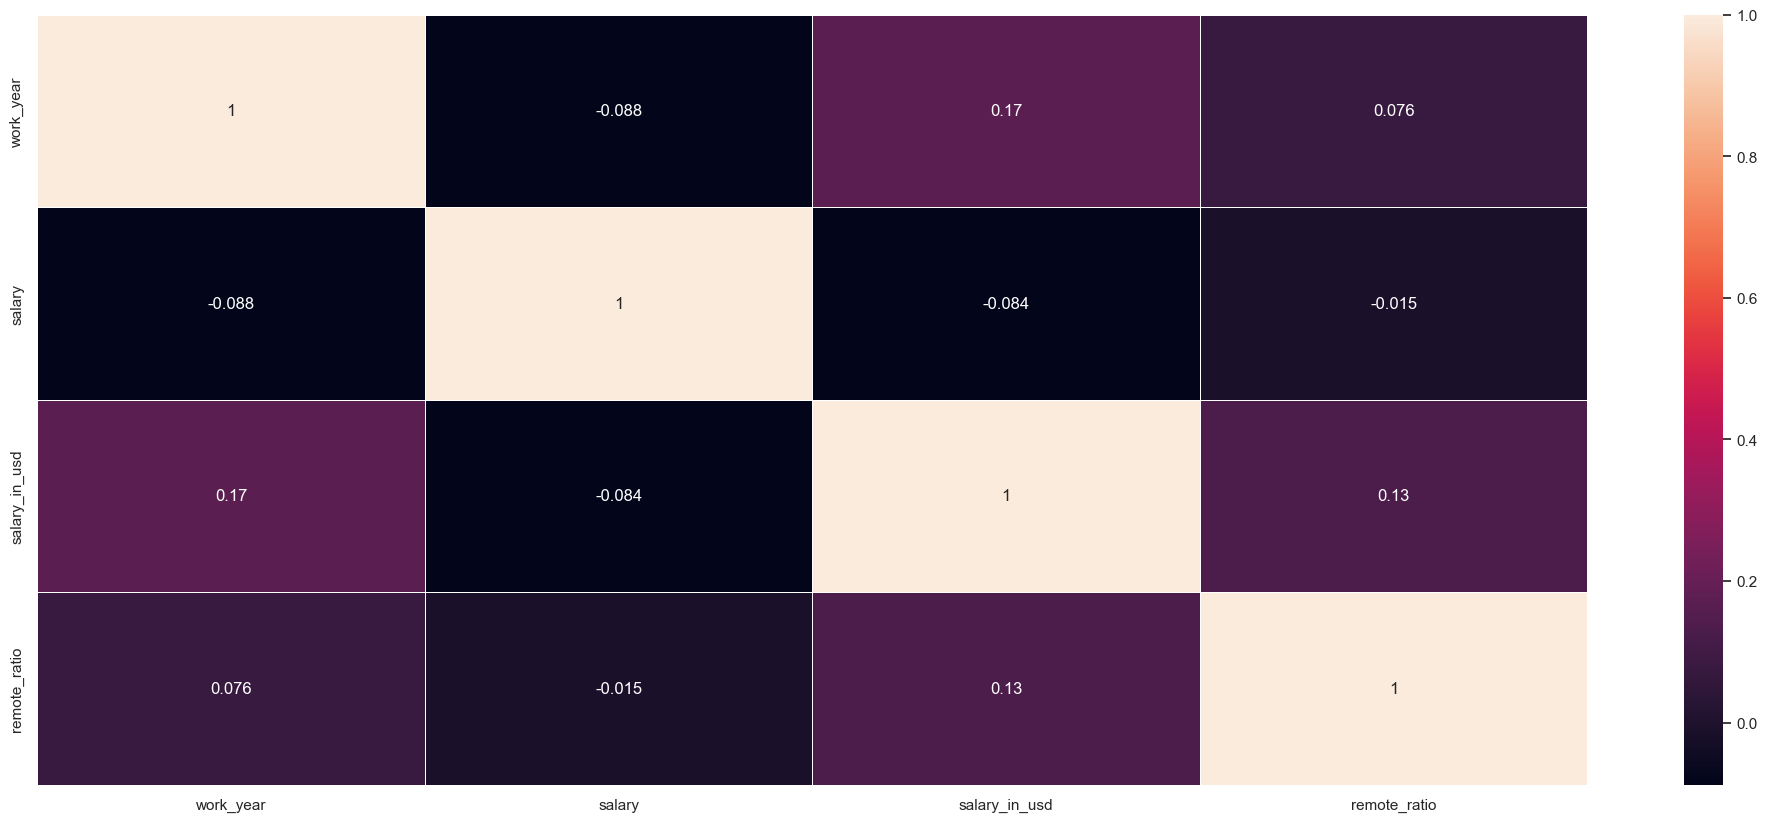

In [10]:
## ТЕПЛОВАЯ МАТРИЦА КОРРЕЛЯЦИЙ
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

Числовые признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше) не обнаружены

## Вывод по описательному анализу:
1. В датасете 607 записей (без пропущенных значений).
2. Количество дубликатов: 0
3. Числовые признаки:
- work_year — Год, в котором была выплачена зарплата.
- salary — Общая выплаченная валовая сумма заработной платы.
- salary_in_usd — Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
- remote_ratio — Общий объём работы, выполняемой удалённо (0, 50, 100).

Категориальные признаки:
- experience_level — Опыт работы на этой должности в течение года (EN, MI, SE, EX).
- nemployment_type — Тип трудоустройства для этой роли (PT, FT, CT, FL).
- job_title — Роль, в которой соискатель работал в течение года.
- salary_currency — Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
- employee_residence — Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
- company_location — Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
- company_size — Среднее количество людей, работавших в компании в течение года (S, M, L).
4. Числовые признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше) не обнаружены
5. Для дальнейшего анализа возьмем признак salary_in_usd, тогда признаки salary и salary_currency примем неинформативными

### Распределение годовых зарплат по всем сотрудникам

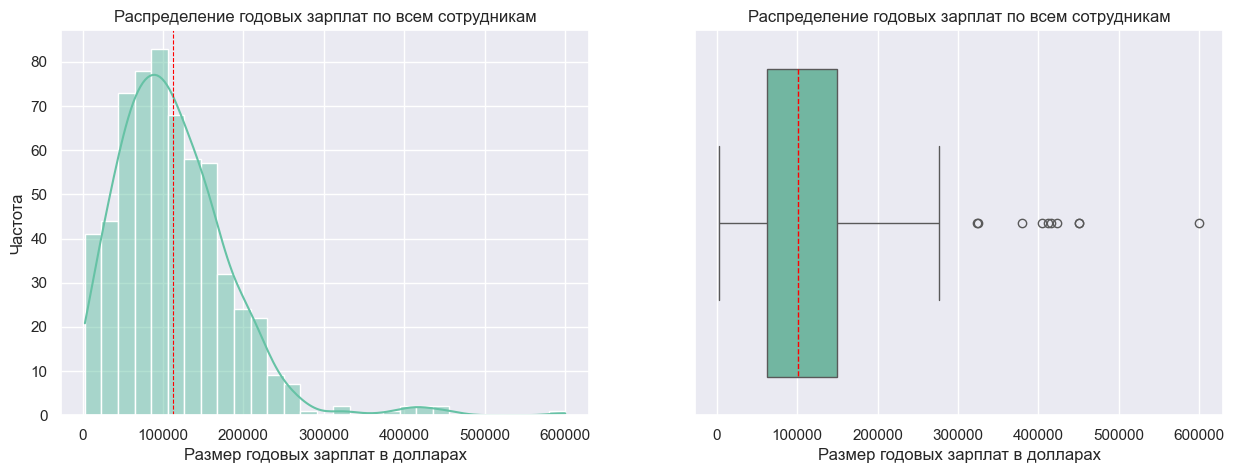

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер годовых зарплат в долларах', ylabel='Частота')
axes[0].set_title('Распределение годовых зарплат по всем сотрудникам')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Размер годовых зарплат в долларах')
axes[1].set_title('Распределение годовых зарплат по всем сотрудникам')

plt.show()

In [12]:
data_agg = data['salary_in_usd'].describe().round(2).to_frame()
data_agg.columns = ['Размер годовых зарплат в долларах']
data_agg

,Размер годовых зарплат в долларах
count,607.00
mean,112297.87
std,70957.26
min,2859.00
25%,62726.00
50%,101570.00
75%,150000.00
max,600000.00


Распределение годовых зарплат отлично от нормального, имеются выбросы.

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist? (В этом случае за DS принимаем все должности)

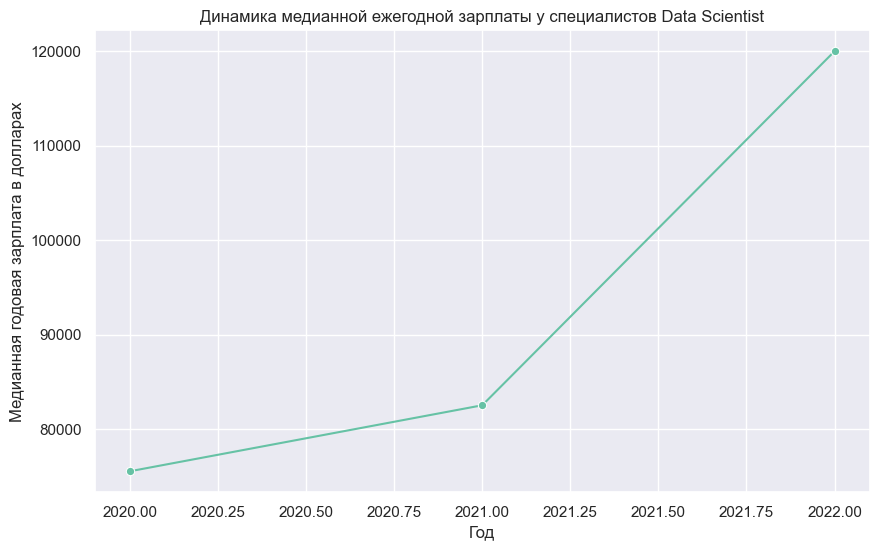

In [13]:
# Рассчитаем медианную зарплату для каждого года
average_salary_per_year = data.groupby('work_year')['salary_in_usd'].median().reset_index()

# Построим график
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=average_salary_per_year, marker='o')
plt.title('Динамика медианной ежегодной зарплаты у специалистов Data Scientist')
plt.xlabel('Год')
plt.ylabel('Медианная годовая зарплата в долларах')
plt.grid(True)
plt.show()


На первый взгляд наблюдается ежегодный рост зарплат. Чтобы определить, являются ли это статистически значимым, в следующем разделе мы проведём статистическое тестирование.

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году? (В этом случае отфильтруем должности DS и DE)

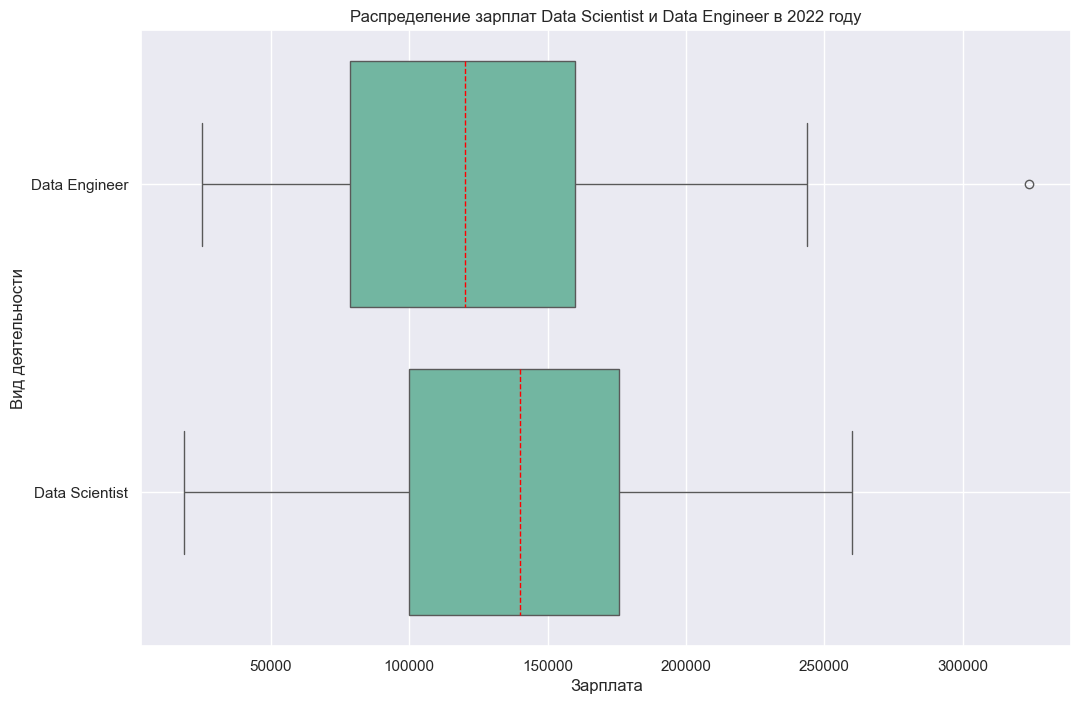

In [14]:
# Фильтрация данных для 2022 года и Data Scientist и Data Engineer
filtered_data = data[(data['work_year'] == 2022) & 
                     ((data['job_title'] == 'Data Scientist') | 
                      (data['job_title'] == 'Data Engineer'))]


# Построение boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(filtered_data, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
plt.title('Распределение зарплат Data Scientist и Data Engineer в 2022 году')
plt.xlabel('Зарплата')
plt.ylabel('Вид деятельности')
plt.grid(True)
plt.show()

In [15]:
data_agg = filtered_data.groupby('job_title')['salary_in_usd'].describe().round(2)
print('Зарплаты в зависимости от вида деятельности')
data_agg

Зарплаты в зависимости от вида деятельности


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,89.0,126375.70,55954.40,25000.0,78526.0,120000.0,160000.0,324000.0
Data Scientist,77.0,136172.09,54563.08,18442.0,100000.0,140000.0,176000.0,260000.0


На первый взгляд зарплаты Data Scientist выше. Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров? (В этом случае за DS принимаем все должности)

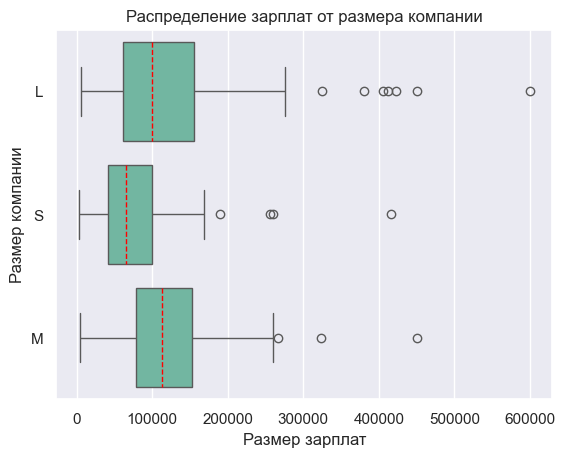

In [16]:
ax = sns.boxplot(data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплат', ylabel='Размер компании')
plt.title('Распределение зарплат от размера компании')
plt.show()

In [17]:
data_agg = data.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Зарплаты от размера компании')
data_agg

Зарплаты от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,198.0,119242.99,86156.74,5882.0,61041.75,100000.0,154600.0,600000.0
M,326.0,116905.47,59287.69,4000.0,78131.50,113188.0,152875.0,450000.0
S,83.0,77632.67,63461.71,2859.0,41943.00,65000.0,100000.0,416000.0


На первый взгляд зарплаты в малых компаниях ниже чем в средних и больших. Чтобы определить, являются ли эти различия статистически значимым, в следующем разделе мы проведём статистические тесты.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании? (В этом случае отфильтруем должности DS и DE)

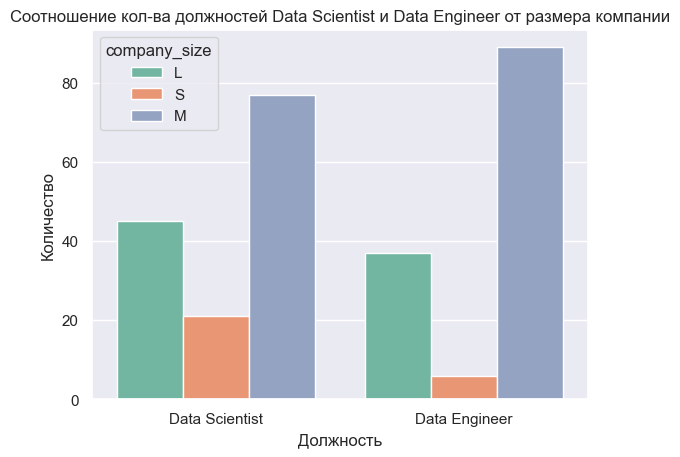

In [18]:
# Фильтрация данных для Data Scientist и Data Engineer
data_filtered = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]
ax = sns.countplot(data_filtered, x=data_filtered['job_title'], hue='company_size')
ax.set(xlabel='Должность', ylabel='Количество')
plt.title('Соотношение кол-ва должностей Data Scientist и Data Engineer от размера компании')
plt.show()

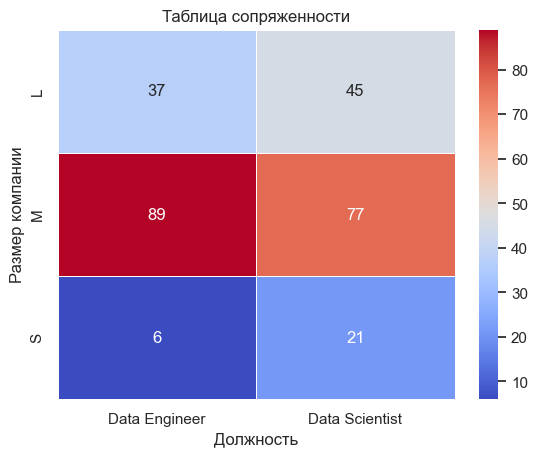

In [19]:
cross_tab = pd.crosstab(index=data_filtered['company_size'], columns=data_filtered['job_title'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Должность', ylabel='Размер компании')
plt.title('Таблица сопряженности')
plt.show()

Согласно данным количество должностей Data Scientist и Data Engineer в средних компаниях (M) выше чем в малых (S) и больших (L). Чтобы определить, являются ли эти различия статистически значимым, в следующем разделе мы проведём статистические тесты.

## Статистический анализ данных



In [20]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

### Наблюдается ли изменения зарплат у специалистов Data Scientist? (В этом случае за DS принимаем все должности)

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплат не изменяется за период 2020-2022, примем за $μ_1$ - медианная зарплата за 2020, $μ_2$ - за 2021, $μ_3$ - за 2023 тогда:

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза* ($H_1$): размер зарплат меняется за период 2020-2022, примем за $μ_1$ - медианная зарплата за 2020, $μ_2$ - за 2021, $μ_3$ - за 2023 тогда:

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [21]:
# значения зарплат за 3 года
salary_2020 = data.loc[data['work_year']==2020, 'salary_in_usd']
salary_2021 = data.loc[data['work_year']==2021, 'salary_in_usd']
salary_2022 = data.loc[data['work_year']==2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Зарплаты в 2020:')
result = stats.shapiro(salary_2020)
decision_normality(result[1])

print('Зарплаты в 2021:')
result = stats.shapiro(salary_2021)
decision_normality(result[1])

print('Зарплаты в 2022:')
result = stats.shapiro(salary_2022)
decision_normality(result[1])

Зарплаты в 2020:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Зарплаты в 2021:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Зарплаты в 2022:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет (только один из двух по нормальному)

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

**Проведём тест**

In [22]:
# проводим тест
_, p = stats.kruskal(salary_2020, salary_2021, salary_2022)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


In [23]:
data_agg = data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Медианные зарплаты по годам')
data_agg

Медианные зарплаты по годам


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,217.0,99853.79,80225.11,2859.0,50000.0,82528.0,135000.0,600000.0
2022,318.0,124522.01,58183.65,10000.0,81666.0,120000.0,160000.0,405000.0


**Вывод**

Мы можем утверждать что наблюдается изменения зарплат в у специалистов Data Scientist за период 2020-2022. Медианные зарплаты растут.

### Размер зарплат Data Scientist выше чем Data Engineer в 2022 году? (В этом случае отфильтруем должности DS и DE)


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зарплат Data Scientist ($μ_1$) статистически ниже либо равен размеру зарплат Data Engineer ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер зарплат Data Scientist ($μ_1$) статистически выше размера зарплат Data Engineer ($μ_2$).
$$ H_1 : μ_1 > μ_2$$




**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [24]:
# значения зарплат Data Scientist и Data Engineer
ds_salary = data.loc[(data['work_year'] == 2022) & (data['job_title'] == 'Data Scientist'), 'salary_in_usd']
de_salary = data.loc[(data['work_year'] == 2022) & (data['job_title'] == 'Data Engineer'), 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Зарплаты Data Scientist:')
result = stats.shapiro(ds_salary)
decision_normality(result[1])

print('Зарплаты Data Engineer:')
result = stats.shapiro(de_salary)
decision_normality(result[1])

Зарплаты Data Scientist:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Зарплаты Data Engineer:
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать U-критерий Манна — Уитни.

**Проведём тест**


In [25]:
# проводим тест
_, p = stats.mannwhitneyu(ds_salary, de_salary, alternative='greater')
decision_hypothesis(p)

p-value = 0.077
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

У нас нет оснований утверждать что размер зарплат Data Scientist статистически выше размера зарплат Data Engineer

### Влияет ли размер компании на зарплаты специалистов Data Scientist? (В этом случае за DS принимаем все должности)

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер зарплат не отличается в разных по размеру компаний: ЗП в небольшой компании S ($μ_1$), ЗП в средней компании M ($μ_2$), ЗП в большой компании L ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер зарплат отличается в разных по размеру компаний: ЗП в небольшой компании S ($μ_1$), ЗП в средней компании M ($μ_2$), ЗП в большой компании L ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [26]:
# значения зарплат
s_salary = data.loc[data['company_size']=='S', 'salary_in_usd']
m_salary = data.loc[data['company_size']=='M', 'salary_in_usd']
l_salary = data.loc[data['company_size']=='L', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('ЗП в небольшой компании:')
result = stats.shapiro(s_salary)
decision_normality(result[1])

print('ЗП в средней компании:')
result = stats.shapiro(m_salary)
decision_normality(result[1])

print('ЗП в большой компании:')
result = stats.shapiro(s_salary)
decision_normality(result[1])


ЗП в небольшой компании:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
ЗП в средней компании:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
ЗП в большой компании:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [27]:
# проводим тест
_, p = stats.kruskal(s_salary, m_salary, l_salary)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


In [28]:
data_agg = data.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Зарплаты от размера компании')
data_agg

Зарплаты от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,198.0,119242.99,86156.74,5882.0,61041.75,100000.0,154600.0,600000.0
M,326.0,116905.47,59287.69,4000.0,78131.50,113188.0,152875.0,450000.0
S,83.0,77632.67,63461.71,2859.0,41943.00,65000.0,100000.0,416000.0


**Вывод**

У нас есть основания утверждать, что размер зарплат зависит от размеров компаний. Наименьшая медианная ЗП у малых компаний

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер компании»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [29]:
# Фильтрация данных для Data Scientist и Data Engineer
data_filtered = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]
# составляем таблицу сопряжённости
cross_table = pd.crosstab(index=data_filtered['company_size'], columns=data_filtered['job_title'])

cross_table

job_title,Data Engineer,Data Scientist
company_size,,
L,37,45
M,89,77
S,6,21


In [30]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании.

### Дополнительное исследование. Если связь между величиной зарплаты и опытом работы в Data Science

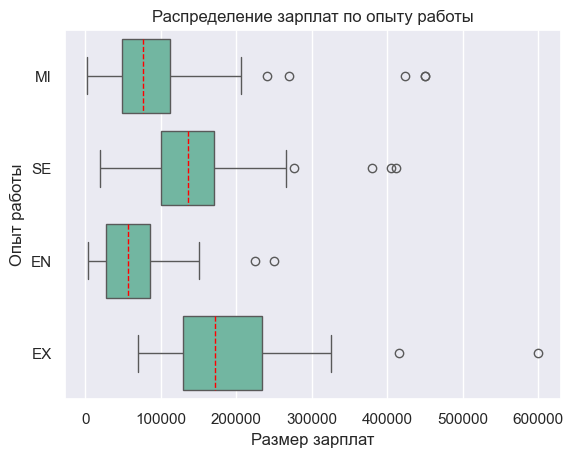

In [31]:
ax = sns.boxplot(data, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплат', ylabel='Опыт работы')
plt.title('Распределение зарплат по опыту работы')
plt.show()

In [32]:
data_agg = data.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('Распределение зарплат по опыту работы')
data_agg

Распределение зарплат по опыту работы


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.0,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.5,171437.5,233750.00,600000.0
MI,213.0,87996.06,63901.06,2859.0,48000.0,76940.0,112000.00,450000.0
SE,280.0,138617.29,57691.98,18907.0,100000.0,135500.0,170000.00,412000.0


Распределения зарплат различны для разных опытов работ. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер зарплат не отличается от опыта работы: EN — Entry-level/Junior ($μ_1$), MI — Mid-level/Intermediate ($μ_2$), Senior-level/Expert ($μ_3$), Executive-level/Director ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

*Альтернативная гипотеза*: размер зарплат отличается от опыта работы: EN — Entry-level/Junior ($μ_1$), MI — Mid-level/Intermediate ($μ_2$), Senior-level/Expert ($μ_3$), Executive-level/Director ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [33]:
# значения зарплат
en_salary = data.loc[data['experience_level']=='EN', 'salary_in_usd']
mi_salary = data.loc[data['experience_level']=='MI', 'salary_in_usd']
se_salary = data.loc[data['experience_level']=='SE', 'salary_in_usd']
ex_salary = data.loc[data['experience_level']=='EX', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('ЗП для Entry-level/Junior:')
result = stats.shapiro(en_salary)
decision_normality(result[1])

print('ЗП для Mid-level/Intermediate:')
result = stats.shapiro(mi_salary)
decision_normality(result[1])

print('ЗП для Senior-level/Expert:')
result = stats.shapiro(se_salary)
decision_normality(result[1])

print('ЗП Executive-level/Director:')
result = stats.shapiro(ex_salary)
decision_normality(result[1])

ЗП для Entry-level/Junior:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
ЗП для Mid-level/Intermediate:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
ЗП для Senior-level/Expert:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
ЗП Executive-level/Director:
p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [34]:
# проводим тест
_, p = stats.kruskal(en_salary, mi_salary, se_salary, ex_salary)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

У нас есть основания утверждать, что размер зарплат зависит от опыта работы.

### Дополнительное исследование. Если связь между величиной зарплаты и типом трудоустройства в Data Science

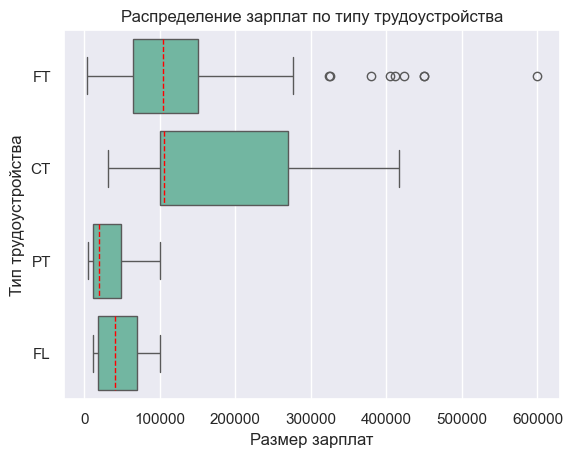

In [35]:
ax = sns.boxplot(data, x='salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зарплат', ylabel='Тип трудоустройства')
plt.title('Распределение зарплат по типу трудоустройства')
plt.show()

In [36]:
data_agg = data.groupby('employment_type')['salary_in_usd'].describe().round(2)
print('Распределение зарплат по типу трудоустройства')
data_agg

Распределение зарплат по типу трудоустройства


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,5.0,184575.00,156250.89,31875.0,100000.00,105000.0,270000.0,416000.0
FL,4.0,48000.00,40529.82,12000.0,18000.00,40000.0,70000.0,100000.0
FT,588.0,113468.07,69476.47,2859.0,64962.25,104196.5,150000.0,600000.0
PT,10.0,33070.50,31472.91,5409.0,12000.00,18817.5,48370.0,100000.0


Распределения зарплат различны для разных опытов работ неоднозначно - для CT — контракт и FT — полный рабочий день близки. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер зарплат не отличается от типа трудоустройства: PT — неполный рабочий день ($μ_1$), FT — полный рабочий день ($μ_2$), CT — контракт ($μ_3$), FL — фриланс ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4$$

*Альтернативная гипотеза*: размер зарплат отличается от типа трудоустройства: PT — неполный рабочий день ($μ_1$), FT — полный рабочий день ($μ_2$), CT — контракт ($μ_3$), FL — фриланс ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [37]:
# значения зарплат
pt_salary = data.loc[data['employment_type']=='PT', 'salary_in_usd']
ft_salary = data.loc[data['employment_type']=='FT', 'salary_in_usd']
ct_salary = data.loc[data['employment_type']=='CT', 'salary_in_usd']
fl_salary = data.loc[data['employment_type']=='FL', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('ЗП для Entry-level/Junior:')
result = stats.shapiro(pt_salary)
decision_normality(result[1])

print('ЗП для Mid-level/Intermediate:')
result = stats.shapiro(ft_salary)
decision_normality(result[1])

print('ЗП для Senior-level/Expert:')
result = stats.shapiro(ct_salary)
decision_normality(result[1])

print('ЗП Executive-level/Director:')
result = stats.shapiro(fl_salary)
decision_normality(result[1])

ЗП для Entry-level/Junior:
p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
ЗП для Mid-level/Intermediate:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
ЗП для Senior-level/Expert:
p-value = 0.406
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
ЗП Executive-level/Director:
p-value = 0.507
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет (только два)

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [38]:
# проводим тест
_, p = stats.kruskal(pt_salary, ft_salary, ct_salary, fl_salary)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

У нас есть основания утверждать, что размер зарплат зависит от типа трудоустройства.

## Итоговые результаты исследования

*   Мы можем утверждать что наблюдается изменения зарплат в у специалистов Data Scientist за период 2020-2022. Медианные зарплаты растут.
*   У нас нет оснований утверждать что размер зарплат Data Scientist статистически выше размера зарплат Data Engineer
*   У нас есть основания утверждать, что размер зарплат зависит от размеров компаний. Наименьшая медианная ЗП у малых компаний
*   Существует взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании.
*   У нас есть основания утверждать, что размер зарплат зависит от опыта работы.
*   У нас есть основания утверждать, что размер зарплат зависит от типа трудоустройства.